<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Ejercicio_de_preprocesamiento_y_normalizaci%C3%B3n_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-- Previsualización del Dataset --
                                                tuit
0  Excelente iniciativa de el uso de energías ren...
1  Inspirador que la contaminación plástica afect...
2  Datos muestran que los niveles de CO2 disminuy...
3  Indignante que las temperaturas globales sigan...
4  Inspirador que la deforestación continúe 🌊 #So...

Datos Cargados. Total de registros: 500
Procesando textos...


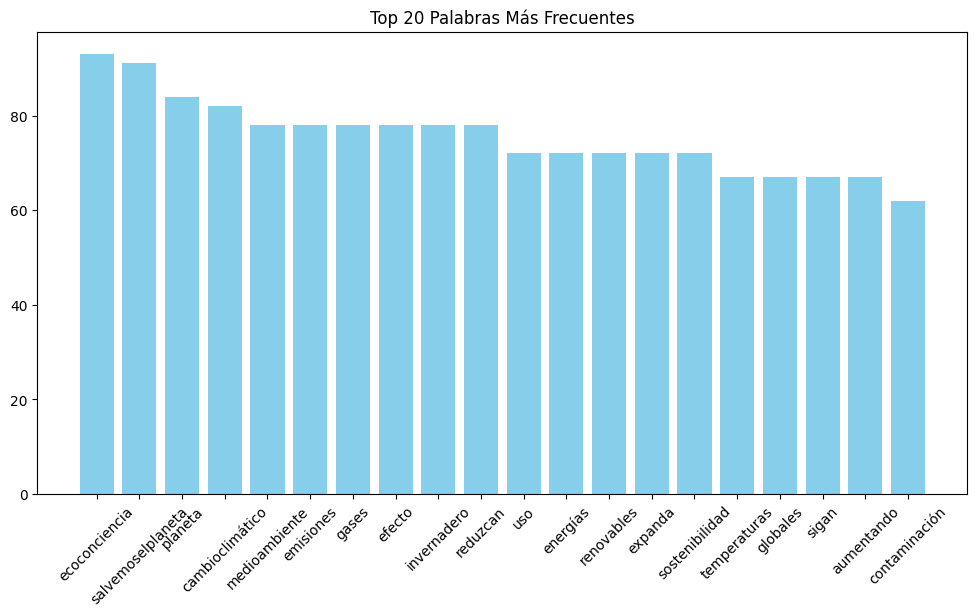

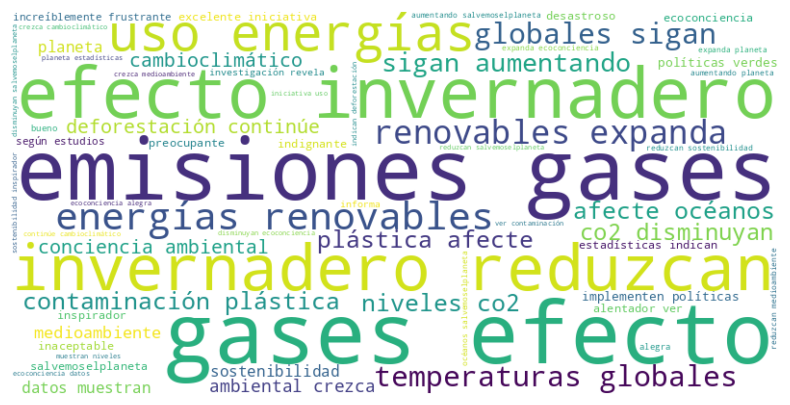

In [5]:
# ==============================================================================
# LIBERIAS
# ==============================================================================

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# ==============================================================================
# CARGA DE DATOS
# ==============================================================================

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Resources/tuits_cambio_climatico.csv')

print('-- Previsualización del Dataset --')
print(df.head())

# ==============================================================================
# PREPROCESAMIENTO
# ==============================================================================

def preprocesar_texto(texto):
    if not isinstance(texto, str):
        return

    # Normalización y limpieza
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto, flags = re.MULTILINE)
    texto = re.sub(r'\@\w+', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)

    # Tokenización y eliminación de stopwords
    tokens = word_tokenize(texto)
    stop_words = set(stopwords.words('spanish'))
    stop_words.update(['rt', 'si', 'q', 'd', 'mas', 'tan', 'asi', 'ser', 'van'])

    return [word for word in tokens if word not in stop_words and len(word) > 2]

# ==============================================================================
# GRAFICAS
# ==============================================================================

def generar_graficas(tokens):

    # Gráfica de Barras
    conteo = Counter(tokens)
    plt.figure(figsize=(12, 6))
    plt.bar([x[0] for x in conteo.most_common(20)], [x[1] for x in conteo.most_common(20)], color='skyblue')
    plt.title('Top 20 Palabras Más Frecuentes')
    plt.xticks(rotation=45)
    plt.show()

    # Nube de Palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# ==============================================================================
# EJECUCION
# ==============================================================================

print(f"\nDatos Cargados. Total de registros: {len(df)}")

print("Procesando textos...")
df['tokens_limpios'] = df['tuit'].apply(preprocesar_texto)

todos_los_tokens = [token for lista in df['tokens_limpios'] for token in lista]
generar_graficas(todos_los_tokens)
